<a href="https://colab.research.google.com/github/czhan244/MAT421/blob/main/Module_H_1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 22 Ordinary Differential Equation - Initial Value Problems**

22.1 ODE Initial Value Problem Statement

A differential equation -- a type of mathematical equation that explains how a function and its variations relate to one another. In other terms, it is an equation that uses a function's derivative.

An ordinary differential equation (ODE) -- a type of differential equation that involves only one independent variable and its derivatives. 

***

22.2 Reduction of Order

Reduction of order is a technique used to find a second solution to a homogeneous linear differential equation, given one known solution.

In [ ]:
import sympy as sym

x = sym.symbols('x')
y = sym.Function('y')(x)

eqn = sym.diff(y, x, 2) + 4*sym.diff(y, x) + 4*y
known_sol = sym.exp(-4*x)
u = sym.Function('u')(x)
y2 = u * known_sol
dy2 = sym.diff(y2, x)
d2y2 = sym.diff(dy2, x)
eqn_sub = eqn.subs(y, y2).subs(sym.diff(y, x), dy2).subs(sym.diff(y, x, 2), d2y2)
eqn_sub = sym.simplify(eqn_sub/known_sol)
u_eqn = sym.Eq(sym.diff(u, x), 0)
u_sol = sym.dsolve(u_eqn)
y2_sol = y2.subs(u, u_sol.rhs)

print("Known solution: ", known_sol)
print("Second solution: ", y2_sol)


Known solution:  exp(-4*x)
Second solution:  C1*exp(-4*x)


***

22.3 The Euler Method

The Euler method -- a numerical method for approximating the solution of a first-order ordinary differential equation (ODE) with a given initial condition.

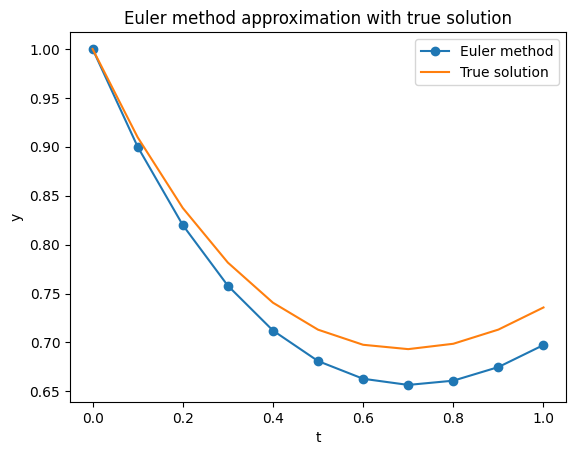

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return -y + t

def y_true(t):
    return t - 1 + 2 * np.exp(-t)

y0 = 1
h = 0.1
t_span = np.arange(0, 1 + h, h)
y_euler = np.zeros(len(t_span))
y_true = y_true(t_span)
y_euler[0] = y0
for i in range(len(t_span) - 1):
    y_euler[i+1] = y_euler[i] + h * f(t_span[i], y_euler[i])

plt.plot(t_span, y_euler, '-o', label='Euler method')
plt.plot(t_span, y_true, '-', label='True solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler method approximation with true solution')
plt.legend()
plt.show()

***

22.4 Numerical Error and Instability

Accuracy --  how close the numerical solution is to the exact solution of the ODE.

Stability -- the ability of a numerical method to produce a solution that does not become unstable or divergent as the solution progresses.

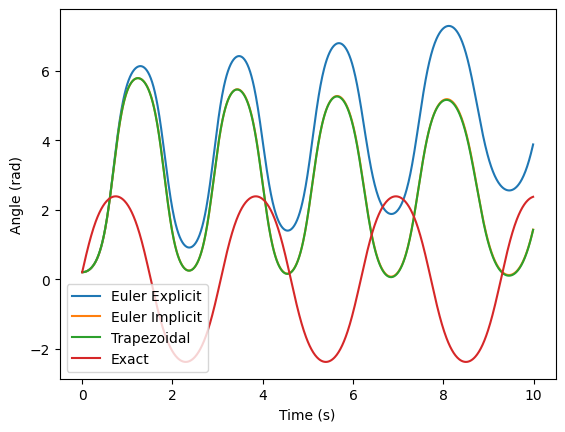

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the pendulum
g = 9.81
L = 1.0

# Define the initial conditions
theta0 = 0.2
omega0 = 0.0

# Define the time step and the time array
dt = 0.01
t = np.arange(0.0, 10.0, dt)

# Define the functions for the exact solution and the right-hand side of the ODE
def exact(theta0, omega0, t):
    omega = omega0
    theta = theta0
    A = g / L
    exact_theta = np.zeros_like(t)
    exact_theta[0] = theta0
    for i in range(1, len(t)):
        theta += omega * dt
        omega -= A * np.sin(theta) * dt
        exact_theta[i] = theta
    return exact_theta

def rhs(theta, omega):
    return -g / L * np.sin(theta)

# Initialize the arrays for the numerical solutions
theta_euler_explicit = np.zeros_like(t)
theta_euler_implicit = np.zeros_like(t)
theta_trapezoidal = np.zeros_like(t)

# Set the initial values
theta_euler_explicit[0] = theta0
theta_euler_implicit[0] = theta0
theta_trapezoidal[0] = theta0

# Solve the ODE using the Euler Explicit, Euler Implicit, and Trapezoidal Formulas
for i in range(1, len(t)):
    # Euler Explicit
    theta_euler_explicit[i] = theta_euler_explicit[i-1] + omega0*dt
    omega0 -= rhs(theta_euler_explicit[i-1], omega0)*dt
    
    # Euler Implicit
    theta_euler_implicit[i] = (theta_euler_implicit[i-1] + omega0*dt) / (1 + (g/L)*dt**2)
    omega0 -= rhs(theta_euler_implicit[i], omega0)*dt
    
    # Trapezoidal
    theta_trapezoidal[i] = (theta_trapezoidal[i-1] + omega0*dt + 0.5*(-g/L)*np.sin(theta_trapezoidal[i-1])*dt**2) / (1 + (g/L)*dt**2)
    omega0 -= 0.5*(rhs(theta_trapezoidal[i-1], omega0) + rhs(theta_trapezoidal[i], omega0))*dt
    
# Plot the numerical solutions and the exact solution
plt.plot(t, theta_euler_explicit, label='Euler Explicit')
plt.plot(t, theta_euler_implicit, label='Euler Implicit')
plt.plot(t, theta_trapezoidal, label='Trapezoidal')
plt.plot(t, exact(theta0, omega0, t), label='Exact')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.show()

***

22.5 Predictor-Corrector Methods

Predictor-corrector -- involves two steps: a predictor step that estimates the solution at the next time step, and a corrector step that improves the estimate by using the predicted value to calculate a more accurate estimate. The predictor step typically uses a simple method like Euler's method, while the corrector step uses a more accurate method like the trapezoidal rule or backward differentiation formula. 

Runge Kutta -- uses a weighted average of several estimates of the derivative at different points within each time step. The most commonly used version is the fourth-order Runge-Kutta method, which involves four evaluations of the derivative at different points within the time step.

***

22.6 Python ODE Solvers

<ipython-input-5-fe25ee2ca8f3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


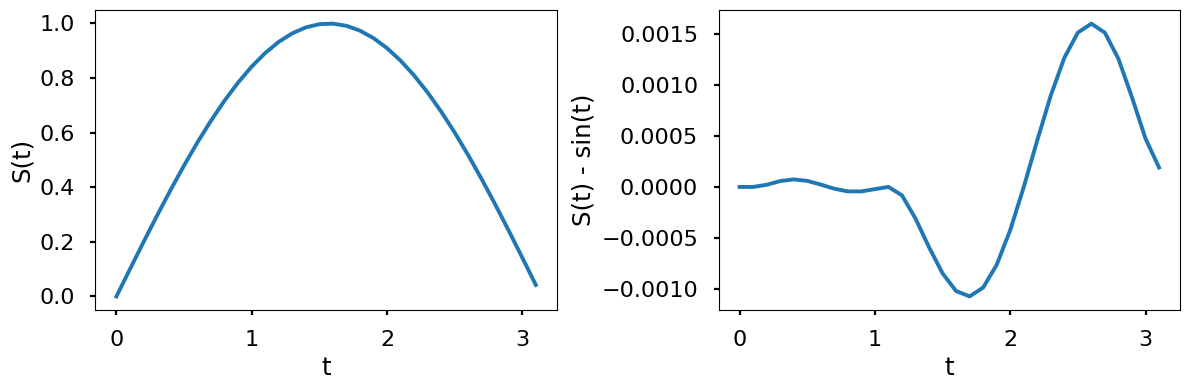

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()